# Advanced Regression

https://www.youtube.com/watch?v=cJpWQkoe4BA&list=PLTNMv857s9WUI1Nz4SssXDKAELESXz-bi&index=4

In [1]:
import numpy as np
import pandas as pd

import math
import random

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [2]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [3]:
price = [1000, 9000, 500, 3000, 9500, 1500, 4000, 2000, 2500]
age = [28, 40, 58, 12, 3, 23, 4, 13, 5]
odometer = [30.298, 19.647, 170.270, 68.394, 11.662, 87.973, 3.496, 40.986, 21.098]
pink_slip = [1, 1, 0, 1, 0, 0, 1, 1, 1]

## let's create 1000 more similar objects:

In [4]:
range_11, range_12 = 0.95, 1.05
range_21, range_22 = -0.1, 0.1

price += [((_ ** random.uniform(range_11, range_12)) + (_ * random.uniform(range_21, range_22))) for _ in price * 1000]
age += [((_ ** random.uniform(range_11, range_12)) + (_ * random.uniform(range_21, range_22))) for _ in age * 1000]
odometer += [((_ ** random.uniform(range_11, range_12)) + (_ * random.uniform(range_21, range_22))) for _ in odometer * 1000]
pink_slip += [_ for _ in pink_slip * 1000]

In [5]:
df = pd.DataFrame({
    'price': price,
    'age': age,
    'odometer': odometer,
    'pink_slip': pink_slip
})

df

,price,age,odometer,pink_slip
0,1000.000000,28.000000,30.298000,1
1,9000.000000,40.000000,19.647000,1
2,500.000000,58.000000,170.270000,0
3,3000.000000,12.000000,68.394000,1
4,9500.000000,3.000000,11.662000,0
...,...,...,...,...
9004,7955.114088,3.067481,10.962201,0
9005,1189.420063,20.491367,71.287762,0
9006,5683.665307,3.773854,3.775828,1
9007,2350.802852,13.010372,38.722136,1


## let's see the distribution of the features (including the target):

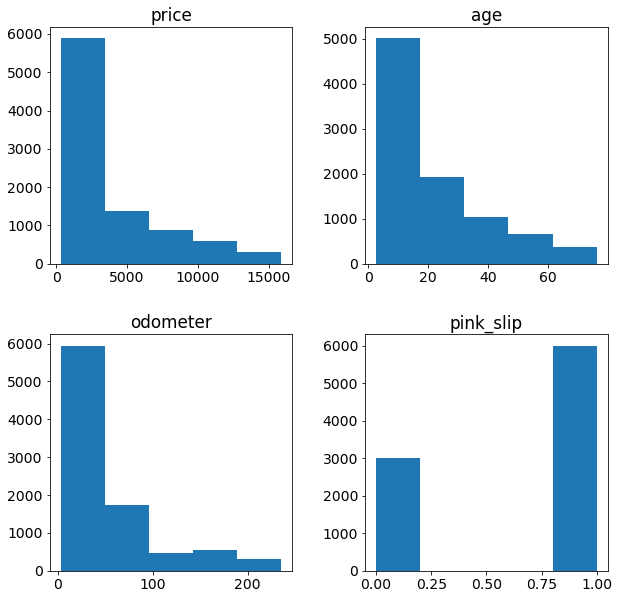

In [6]:
df.hist(figsize=(10, 10), bins=5, grid=False);

## let's also take a look on dependancies of features with the target:

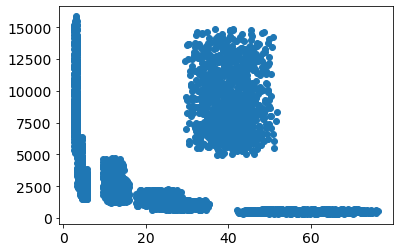

In [7]:
plt.scatter(df['age'], df['price'])
plt.show()

### as it's seen there's no linear dependance; it resemles hyperbola

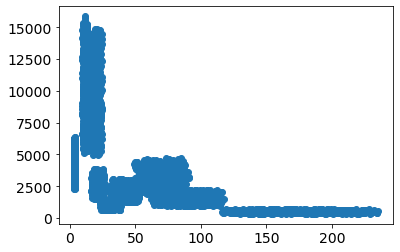

In [8]:
plt.scatter(df['odometer'], df['price'])
plt.show()

### as it's seen there's no linear dependance; it resemles hyperbola

In [9]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(5,5))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 10000], [0, 10000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [10]:
def print_coefs(columns, coefficients, intercept):
    print(f'intercept: {intercept}')
    for _ in zip(columns, coefficients):
        print(f'{_[0]}: {_[1]}')

# 1.

## let's create a LinearRegression model, train it and predict the results on the same data:

In [11]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()

In [12]:
model = LinearRegression()

R2:	0.291
RMSE:	2957.976
MSE:	8749623.548


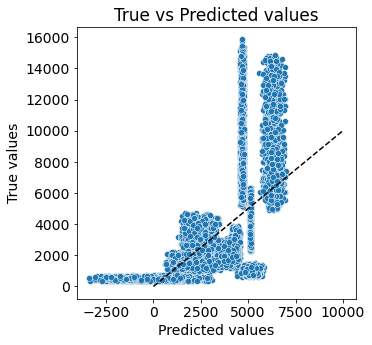

In [13]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

## let's see the coefficients the model has got:

In [14]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 5069.150088628194
age: 54.276860335785884
odometer: -47.48243510430991


### looks like the model increases a price of a car by 64.72 for each year of age

### that's wrong!

# 2.

# Logarithming Features

## let's create a new feature named 'age_log' by logarithming 'age':

In [15]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()

X['age_log'] = X['age'].apply(lambda x: math.log(x))
X = X[[
       'age',
       'odometer', 
       'age_log'
      ]]

R2:	0.409
RMSE:	2699.648
MSE:	7288101.417


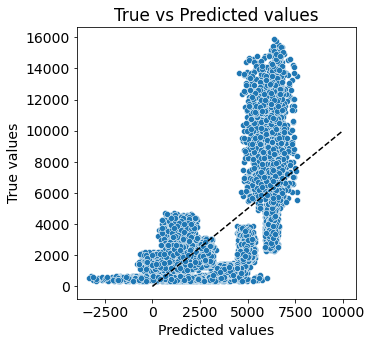

In [16]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

### R2 improved

# 3.

## let's add one more feature named 'odometer_log' by logarithming 'odometer':

In [17]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()

X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))
X = X[[
       'age',
       'odometer', 
       'age_log',
       'odometer_log'
      ]]

R2:	0.425
RMSE:	2663.614
MSE:	7094839.991


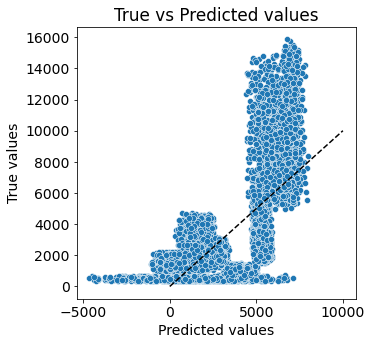

In [18]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

### R2 improved

## let's see the coefficients the model has gotten:

In [19]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 8868.061411943592
age: 268.65407908614924
odometer: -67.95060078491711
age_log: -4237.4234229593885
odometer_log: 1108.7752265548204


### looks like the model is trying to balance somehow features and their logarithmic versions: 'age' has positive coefficient, but its derivative not; the same applies to 'odometer'

# 4.

## let's apply StandardScaler and MinMaxScaler:

In [20]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()

X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))
X

,age,odometer,age_log,odometer_log
0,28.000000,30.298000,3.332205,3.411082
1,40.000000,19.647000,3.688879,2.977925
2,58.000000,170.270000,4.060443,5.137385
3,12.000000,68.394000,2.484907,4.225285
4,3.000000,11.662000,1.098612,2.456336
...,...,...,...,...
9004,3.067481,10.962201,1.120857,2.394453
9005,20.491367,71.287762,3.020004,4.266725
9006,3.773854,3.775828,1.328097,1.328620
9007,13.010372,38.722136,2.565747,3.656411


In [21]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [22]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

X[X.columns] = scaler.fit_transform(X)
X

,age,odometer,age_log,odometer_log
0,0.344963,0.117699,0.704733,0.531938
1,0.507669,0.071861,0.809773,0.433030
2,0.751727,0.720085,0.919198,0.926125
3,0.128023,0.281650,0.455206,0.717855
4,0.005994,0.037497,0.046946,0.313930
...,...,...,...,...
9004,0.006909,0.034485,0.053497,0.299799
9005,0.243155,0.294103,0.612791,0.727317
9006,0.016486,0.003558,0.114529,0.056425
9007,0.141722,0.153953,0.479014,0.587957


R2:	0.425
RMSE:	2663.614
MSE:	7094839.991


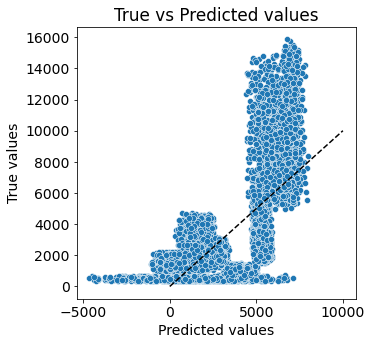

In [23]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

### no changes in R2!!!

In [24]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 6574.227139702341
age: 19814.03482518528
odometer: -15789.183184685951
age_log: -14388.656466120075
odometer_log: 4855.768720339127


# 5.

## let's create 2 more more features - 'age' ** 2 and 'odometer' ** 2

In [25]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()


X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))

# !!!
X['age_squared'] = X['age'].apply(lambda x: x ** 2)
X['odometer_squared'] = X['odometer'].apply(lambda x: x ** 2)


X = X[[
       'age', 
       'odometer', 
       'age_log', 
       'odometer_log',
       'age_squared', 
       'odometer_squared'
      ]]

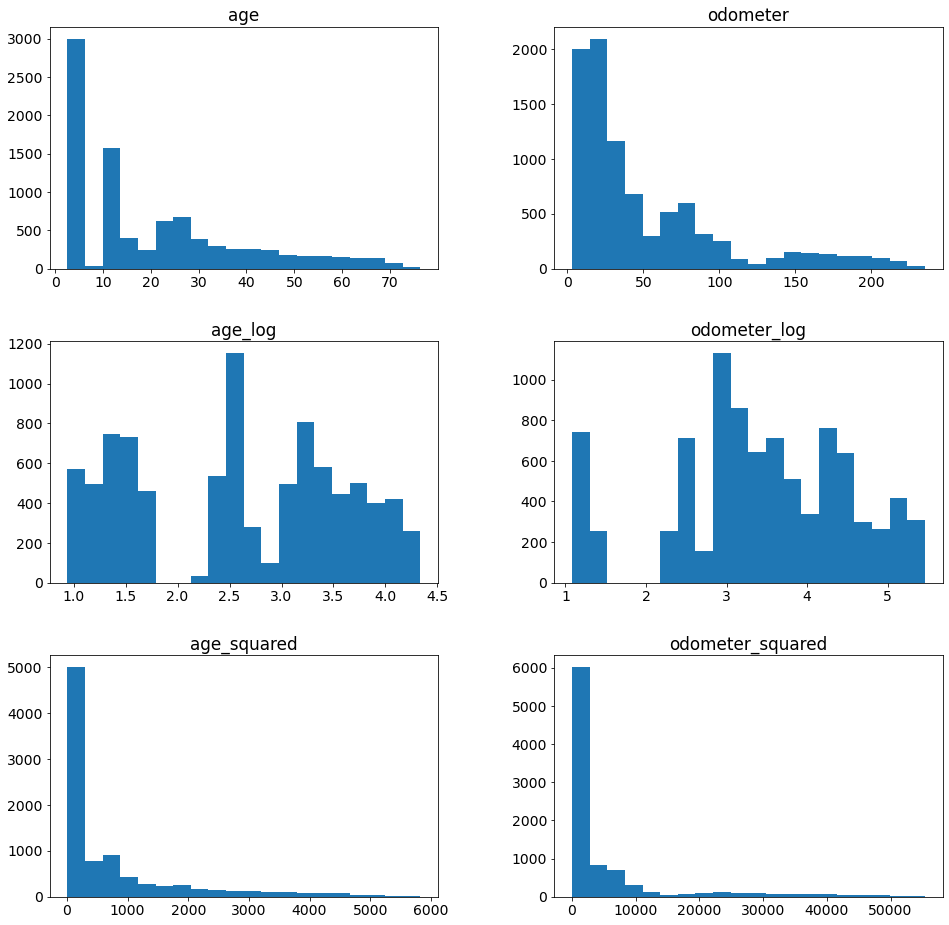

In [26]:
X.hist(figsize=(16, 16), bins=20, grid=False);

R2:	0.512
RMSE:	2453.741
MSE:	6020846.713


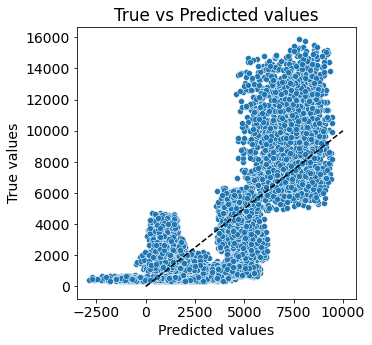

In [27]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

### R2 improved

## let's see the coefficients the model has gotten:

In [28]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 13855.080598458895
age: 1047.9512673582683
odometer: -57.84466193255666
age_log: -10830.24239757024
odometer_log: 1545.2081715344943
age_squared: -8.00749552464937
odometer_squared: -0.00039664730274830166


# 6.

## let's try to logarithm and delogarithm the target:

In [29]:
X = df[['age', 'odometer']].copy()
y = df['price'].copy()

y = y.apply(lambda x: math.log(x)) # !!!

X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))


X['age_squared'] = X['age'].apply(lambda x: x ** 2)
X['odometer_squared'] = X['odometer'].apply(lambda x: x ** 2)


X = X[['age', 
       'odometer', 
       'age_log', 
       'odometer_log', 
       'age_squared', 
       'odometer_squared'
      ]]
X

,age,odometer,age_log,odometer_log,age_squared,odometer_squared
0,28.000000,30.298000,3.332205,3.411082,784.000000,917.968804
1,40.000000,19.647000,3.688879,2.977925,1600.000000,386.004609
2,58.000000,170.270000,4.060443,5.137385,3364.000000,28991.872900
3,12.000000,68.394000,2.484907,4.225285,144.000000,4677.739236
4,3.000000,11.662000,1.098612,2.456336,9.000000,136.002244
...,...,...,...,...,...,...
9004,3.067481,10.962201,1.120857,2.394453,9.409441,120.169856
9005,20.491367,71.287762,3.020004,4.266725,419.896140,5081.945054
9006,3.773854,3.775828,1.328097,1.328620,14.241973,14.256876
9007,13.010372,38.722136,2.565747,3.656411,169.269768,1499.403804


R2:	0.432
RMSE:	2646.523
MSE:	7004086.213


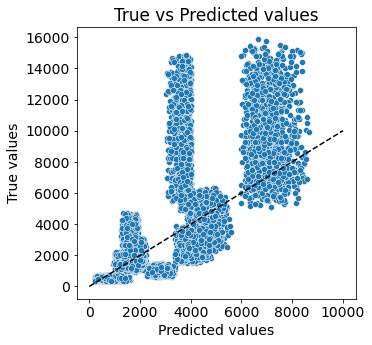

In [30]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(math.e ** y, math.e ** y_predicted)  # to delogarithm the answers it's just required 
                                                    # to raise math.e to power of y

### R2 deteriorated

# 7.

## let's add pink_slip feature:

https://www.youtube.com/watch?v=HSHcIHMxhbE&list=PLTNMv857s9WUI1Nz4SssXDKAELESXz-bi&index=9

In [31]:
X = df[['age', 'odometer', 'pink_slip']].copy()
y = df['price'].copy()


X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))


X['age_squared'] = X['age'].apply(lambda x: x ** 2)
X['odometer_squared'] = X['odometer'].apply(lambda x: x ** 2)


X = X[[
       'age', 
       'odometer', 
       'age_log', 
       'odometer_log',
       'age_squared', 
       'odometer_squared',
       'pink_slip'  # !!!
      ]]

R2:	0.525
RMSE:	2421.86
MSE:	5865405.381


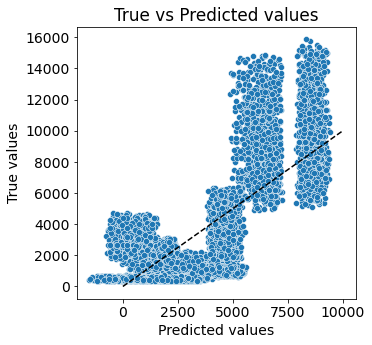

In [32]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

In [33]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 11877.59095116062
age: 701.3402546123816
odometer: -92.40051565887143
age_log: -7090.877511911653
odometer_log: 1411.9920722577635
age_squared: -5.1305640623689746
odometer_squared: 0.11697386611877347
pink_slip: -1657.3569398755994


### R2 improved

# 8.

## let's add dummy variables created out of 'age':

In [34]:
X = df[['age', 'odometer', 'pink_slip']].copy()
y = df['price'].copy()


X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))


X['age_squared'] = X['age'].apply(lambda x: x ** 2)
X['odometer_squared'] = X['odometer'].apply(lambda x: x ** 2)

# !!!
X['age_cat_1'] = 0
X['age_cat_2'] = 0
X['age_cat_3'] = 0
X['age_cat_4'] = 0
X.loc[X['age'] <= 5, 'age_cat_1'] = 1
X.loc[(X['age'] > 5) & (X['age'] <= 15), 'age_cat_2'] = 1
X.loc[(X['age'] > 15) & (X['age'] <= 35), 'age_cat_3'] = 1
X.loc[X['age'] > 35, 'age_cat_4'] = 1


X = X[[
       'age', 
       'odometer', 
       'age_log', 
       'odometer_log',
       'age_squared', 
       'odometer_squared',
       'pink_slip',
#        'age_cat_1',
#        'age_cat_2',
       'age_cat_3',  # !!!
#        'age_cat_4'
      ]]

### actually, not all the dummy variables are required due to "dummy variable trap" or for other reasons; here we can remove up to 3 without losing in quality!

R2:	0.656
RMSE:	2059.496
MSE:	4241522.015


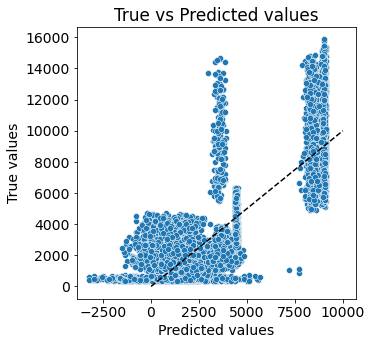

In [35]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

In [36]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 8799.571572212508
age: 395.2090376186019
odometer: -116.11418680146217
age_log: -1007.2386204072361
odometer_log: 605.7181143613341
age_squared: -4.484919942561702
odometer_squared: 0.19435392590058043
pink_slip: -4836.403042838809
age_cat_3: -4654.869480054992


### R2 improved significantly

# 9.

## let's add one more feature - multiplication of pink_slip and age_cat_4

## this thing is called - INTERACTION!

the idea is that an old car with a road worthy certificate may have a good price

In [37]:
X = df[['age', 'odometer', 'pink_slip']].copy()
y = df['price'].copy()


X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))


X['age_squared'] = X['age'].apply(lambda x: x ** 2)
X['odometer_squared'] = X['odometer'].apply(lambda x: x ** 2)


X['age_cat_1'] = 0
X['age_cat_2'] = 0
X['age_cat_3'] = 0
X['age_cat_4'] = 0
X.loc[X['age'] <= 5, 'age_cat_1'] = 1
X.loc[(X['age'] > 5) & (X['age'] <= 15), 'age_cat_2'] = 1
X.loc[(X['age'] > 15) & (X['age'] <= 35), 'age_cat_3'] = 1
X.loc[X['age'] > 35, 'age_cat_4'] = 1


# !!!
X['pink_slip_x_age_cat_4'] = X['pink_slip'] * X['age_cat_4']


X = X[[
       'age', 
       'odometer', 
       'age_log', 
       'odometer_log',
       'age_squared', 
       'odometer_squared',
       'pink_slip',
#        'age_cat_1',
#        'age_cat_2',
       'age_cat_3',
       'age_cat_4',  # this feature is activated too!!!
       'pink_slip_x_age_cat_4'  # !!!
      ]]

R2:	0.725
RMSE:	1842.464
MSE:	3394672.975


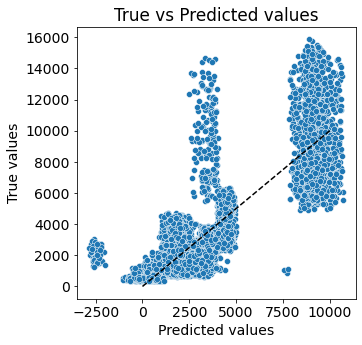

In [38]:
model.fit(X, y)
y_predicted = model.predict(X)
evaluate_preds(y, y_predicted)

In [39]:
print_coefs(X.columns, model.coef_, model.intercept_)

intercept: 13418.281695713604
age: 904.1095461944944
odometer: -51.85193985986135
age_log: -6474.920571664456
odometer_log: 289.2245622403244
age_squared: -6.773651788653373
odometer_squared: 0.14324151552031056
pink_slip: -3741.946654194663
age_cat_3: -5936.386951894714
age_cat_4: -12866.265422368131
pink_slip_x_age_cat_4: 10915.611269536172


### R2 improved significantly

## FINAL TEST OF MODEL:

## CONDITIONS: https://www.youtube.com/watch?v=HSHcIHMxhbE&list=PLTNMv857s9WUI1Nz4SssXDKAELESXz-bi&index=9

In [40]:
X = pd.DataFrame({
    'price': [0],
    'age': [43],
    'odometer': [290.000],
    'pink_slip': [1]
})

In [41]:
X['age_log'] = X['age'].apply(lambda x: math.log(x))
X['odometer_log'] = X['odometer'].apply(lambda x: math.log(x))


X['age_squared'] = X['age'].apply(lambda x: x ** 2)
X['odometer_squared'] = X['odometer'].apply(lambda x: x ** 2)


X['age_cat_1'] = 0
X['age_cat_2'] = 0
X['age_cat_3'] = 0
X['age_cat_4'] = 0
X.loc[X['age'] <= 5, 'age_cat_1'] = 1
X.loc[(X['age'] > 5) & (X['age'] <= 15), 'age_cat_2'] = 1
X.loc[(X['age'] > 15) & (X['age'] <= 35), 'age_cat_3'] = 1
X.loc[X['age'] > 35, 'age_cat_4'] = 1


# !!!
X['pink_slip_x_age_cat_4'] = X['pink_slip'] * X['age_cat_4']


X = X[[
       'age', 
       'odometer', 
       'age_log', 
       'odometer_log',
       'age_squared', 
       'odometer_squared',
       'pink_slip',
#        'age_cat_1',
#        'age_cat_2',
       'age_cat_3',
       'age_cat_4',  # this feature is activated too!!!
       'pink_slip_x_age_cat_4'  # !!!
      ]]

In [42]:
y_predicted = model.predict(X)
y_predicted

array([8373.85493838])

the model in the video predicted: 8468